In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
# Summary
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from scipy.stats import randint

# tensor-Keras
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
from sklearn.impute import SimpleImputer


import warnings
import scipy.io
print("TensorFlow version: ", tf.__version__)

warnings.filterwarnings('ignore')

In [ ]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer
# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import sparse
from itertools import combinations
import string 

In [ ]:
print(tf.test.gpu_device_name())
# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth

# NLP PIPELINE

There are mainly 4 stages of an NLP pipeline :  

## Exploratory Data Analysis
## Text Processing
    Cleaning
    Normalization
    Tokenize
    Stop word removal
    Stemming and Lemmatization
    POS and NER
    
## Feature Extraction
    Bag of Words
    TF-IDF
    word2vec
    Glove

##  Modeling
    Model
    Train
    Predict 

In [ ]:
# Import the datasets
train_raw= pd.read_csv('../input/commonlitreadabilityprize/train.csv')
test_raw = pd.read_csv('../input/commonlitreadabilityprize/test.csv')

# Text Preprocessing
Data preprocessing is the phase of preparing raw data to make it suitable for a machine learning model. 

For NLP, that includes text cleaning, stopwords removal, stemming and lemmatization.

Text cleaning steps vary according to the type of data and the required task. Generally, the string is converted to lowercase and punctuation is removed before text gets tokenized. Tokenization is the process of splitting a string into a list of strings (or “tokens”).
I will put all those preprocessing steps into a single function and apply it to the whole dataset

## Cleaning
Before we start using the tweets' text we clean it. We'll do the this in the class CleanText:
- remove the **mentions**, as we want to make the model generalisable.
- remove the **hash tag sign** (#) but not the actual tag as this may contain information
- set all words to **lowercase**
- remove all **punctuations**, including the question and exclamation marks
- remove the **urls** as they do not contain useful information and we did not notice a distinction in the number of urls used between the sentiment classes
- make sure the converted **emojis** are kept as one word. 
- remove **digits**
- remove **stopwords**
- apply the **Lem** to keep the lem  of the words

https://srinivas-yeeda.medium.com/preprocessing-for-natural-language-processing-498df071ab6e

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
class CleanText(BaseEstimator, TransformerMixin):
   
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def Lemmatizing(self, input_text):
        # Create our list of stopwords
        # Lemmatizing each token and converting each token into lowercase
       
        # use word_tokenize to tokenize the sentences
        mytokens = nlp(input_text)
        mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
        return " ".join(mytokens)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.Lemmatizing)
        return clean_X

In [ ]:
#ct = CleanText()
#train_clean = ct.fit_transform(train_raw['excerpt'])

In [ ]:
#empty_clean = train_clean == ''
#print('{} records have no words left after text cleaning'.format(train_clean[empty_clean].count()))
#train_clean.loc[empty_clean] = '[no_text]'

In [ ]:
#df_model = train_raw.copy()
#df_model['clean_text'] = train_clean
#df_model.columns.tolist()

# Vocab Size 

In [ ]:
# Transform the list of sentences into a list of words
#all_words = ' '.join(df_model['clean_text']).split(' ')
#all_words=[w for w in DOC ]
# Get number of unique words
#vocab_size = len(set(all_words))
#print(vocab_size)

# X and y 

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import tensorflow as tf 
features =train_raw['excerpt']
target = train_raw['target'].values

# Transfer learning + XGBR
## Bert Embedding 
###  Preparation and Feature Extraction for bert model :
#### Tokenization

We have our text data in the textcolumn, which we now need to tokenize. We will use the BERT tokenizer, because we will use a BERT transformer later.
Train Data
feature Extraction X :
https://www.kaggle.com/colearninglounge/vectorization-embeddings-elmo-bert-gpt

In [ ]:
import pandas as pd
from transformers import TFBertModel
from transformers import AutoTokenizer

SEQ_LEN = 128  # we will cut/pad our sequences to a length of 128 tokens

tokenizer = AutoTokenizer.from_pretrained('../input/huggingface-bert/bert-base-uncased')

def tokenize(sentence):
    tokens = tokenizer.encode_plus(sentence, max_length=SEQ_LEN,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_attention_mask=True,
                                   return_token_type_ids=False, return_tensors='tf')
    return tokens['input_ids'], tokens['attention_mask']

# initialize two arrays for input tensors
Xids = np.zeros((len(train_raw), SEQ_LEN))
Xmask = np.zeros((len(train_raw), SEQ_LEN))

for i, sentence in enumerate(train_raw['excerpt']):
    Xids[i, :], Xmask[i, :] = tokenize(sentence)
    if i % 10000 == 0:
        print(i)  # do this so we can see some progress

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

tokenizer = BertTokenizer.from_pretrained('../input/huggingface-bert/bert-base-uncased')
bert_model = TFBertModel.from_pretrained('../input/huggingface-bert/bert-base-uncased')
input_ids = tf.keras.layers.Input(shape=(128,), name='input_token', dtype='int32')
input_masks_ids = tf.keras.layers.Input(shape=(128,), name='masked_token', dtype='int32')
bert_output=bert_model([input_ids,input_masks_ids])[0][:,0,:]

model= tf.keras.Model(inputs=[input_ids,input_masks_ids],outputs=[bert_output])
model.summary()

In [ ]:
Xids.shape

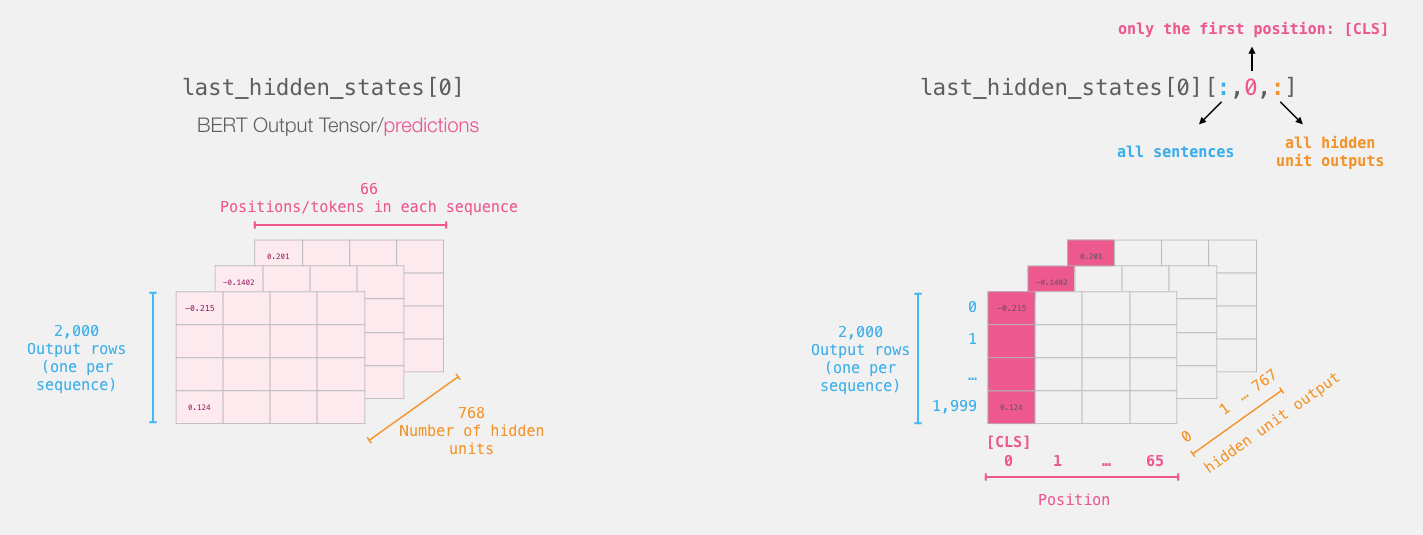!

In [ ]:
cls_emb = model.predict([Xids, Xmask])
cls_emb.shape

In [ ]:
cls_emb.shape

# XGBR + Bert Embedding 

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import sparse
from itertools import combinations


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)
# Outlier Handle 
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal)  

## Complete Pipe 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


cross_validation_design = KFold(n_splits=3,
                                shuffle=True,
                                random_state=77)

cross_validation_design

In [ ]:
from xgboost import XGBRegressor
from numpy import absolute
from numpy import mean
XGB_pipe=Pipeline([('Scaler',StandardScaler()),
                   #('dim_red', SelectKBest(f_regression, k=50)),
                   #('int', SparseInteractions(degree=2)),
                   ('XGB',  XGBRegressor(verbosity=0,n_estimators=120, n_jobs=6))])

In [ ]:
target.shape

In [ ]:
#scores = cross_val_score(XGB_pipe, cls_emb, target, scoring='neg_mean_squared_error', cv=cross_validation_design, n_jobs=-1)
# convert scores to positive
#scores = absolute(scores)
# summarize the result
#s_mean = mean(scores)
#print('Mean mean_squared_error: %.3f' % (s_mean))

In [ ]:
#XGB_pipe.fit(cls_emb,target)
#XGB_pipe.score(cls_emb,target)

#  Deep Learning Approch
# Simple Stack LSTM

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


# Avoid Overfitting :

In order to prevent overfitting, EarlyStopping should monitor a validation metric. Because your loss function is the mse, by monitoring val_loss you are essentially monitoring the validation Mean Squared Error. If you think that mae is a better metric for your task, you should monitor val_mae instead.

Why monitor a validation metric when performing early stopping?

Early stopping, is mostly intended to combat overfitting in your model. Overfitting is a phenomenon, commonly occurring in Machine Learning, where a model performs worse on a validation/test set than the training set.

In [ ]:
# Build and compile the model
def create_model():
    optimizer = tf.keras.optimizers.Adam(0.01)
    #loss = tf.keras.losses.CategoricalCrossentropy()  # categorical = one-hot

    best_weights_file = "./weights.h5"
    batch_size = 8
    max_epochs= 1500
    es = EarlyStopping(monitor='val_loss',min_delta=0.00000000000000000001, patience=10)
    rmse = RootMeanSquaredError()
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    model_RNN = tf.keras.Sequential(name='model_RNN')
    model_RNN.add(tf.keras.layers.LSTM(64,input_shape=(1,768),  return_sequences=True  ))
    model_RNN.add(tf.keras.layers.LSTM(32, return_sequences=False))
    model_RNN.add(tf.keras.layers.Dense(16))
    model_RNN.add(tf.keras.layers.Dense(1, name='outputs'))
    model_RNN.compile(optimizer=optimizer, loss='mse', metrics=[rmse])
    return model_RNN

In [ ]:
# Create a basic model instance
model_RNN = create_model()
# Display the model's architecture
model_RNN.summary()

In [ ]:
# configure early stopping
best_weights_file = "./weights.h5"
es = EarlyStopping(monitor='val_loss',min_delta=0.000000000000000000001, patience=20)
m_ckpt = ModelCheckpoint(best_weights_file, monitor='val_loss', mode='max', verbose=2,
                             save_weights_only=True, save_best_only=True)
# fit model using our gpu
with tf.device('/gpu:0'):
    history_model_RNN =model_RNN.fit(cls_emb.reshape(-1, 1,768),
                                     target.reshape(-1, 1, 1), 
                                     batch_size=4,
                                     epochs=1000, 
                                     verbose=0,
                                     callbacks=[es ,m_ckpt],
                                     validation_split=0.1)

# Evaluate 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['root_mean_squared_error']
    val_acc = history.history['val_root_mean_squared_error']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training root_mean_squared_error')
    plt.plot(x, val_acc, 'r', label='Validation root_mean_squared_error')
    plt.title('Training and validation root_mean_squared_error')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history_model_RNN)


In [ ]:
loss_RNN, root_mean_squared_error_RNN = model_RNN.evaluate( cls_emb.reshape(-1, 1,768),
                                     target.reshape(-1, 1, 1), verbose=0)
print('root_mean_squared_error_model: %f' % (root_mean_squared_error_RNN ))
print('loss_model: %f' % (loss_RNN ))

# Best saved wieghts score 

In [ ]:
def load_model():
    bestsavedRnn = create_model()
    best_weights_file = "./weights.h5"
    batch_size = 8
    max_epochs= 1500
    rmse = RootMeanSquaredError()
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    bestsavedRnn.compile(optimizer=optimizer, loss='mse', metrics=[rmse])
    return bestsavedRnn
bestsavedRnn = load_model()
loss_savedRnn, root_mean_squared_error_savedRnn = bestsavedRnn.evaluate( cls_emb.reshape(-1, 1,768),
                                     target.reshape(-1, 1, 1), verbose=0)
print('root_mean_squared_error_model: %f' % (root_mean_squared_error_savedRnn *100))
print('loss_model: %f' % (loss_savedRnn*100))

# CNN+LSTM 
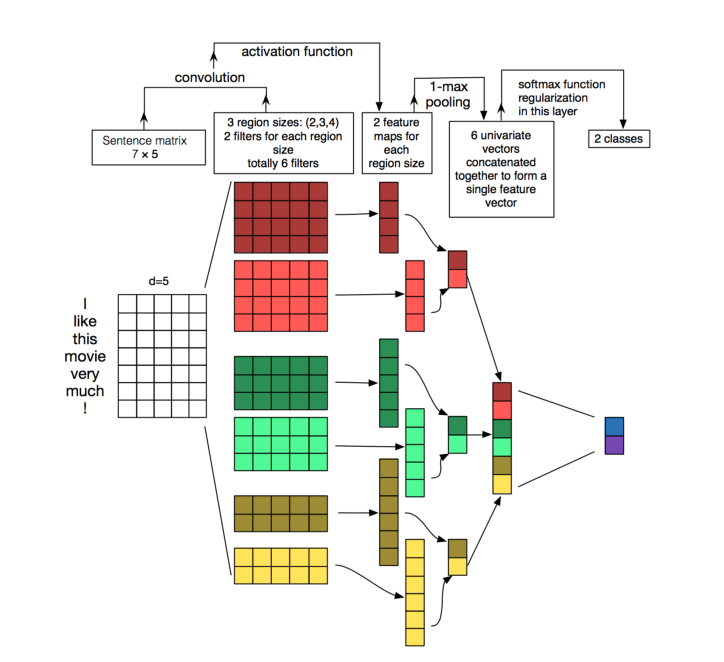

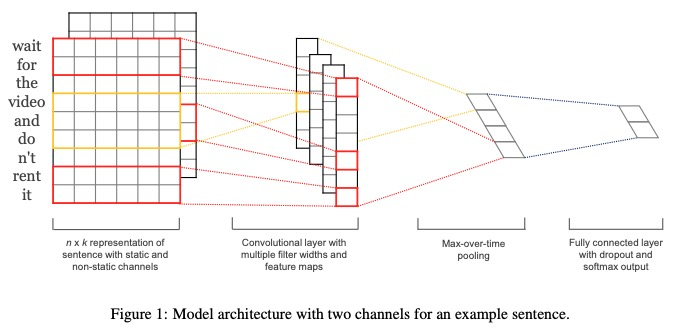

#Convolutional neural networks have been found to work well with text data ,the CNN Model for feature extraction 
#LSTM Model for interpreting the features across time steps.
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Concatenate



model_CNN_LSTM = tf.keras.Sequential(name='model_CNN_LSTM')
model_CNN_LSTM.add(tf.keras.layers.Conv1D(200, 7, input_shape=(1,768),activation='relu',padding='same'))
#model_CNN_LSTM.add(tf.keras.layers.MaxPooling1D(pool_size=3,padding="VALID"))
model_CNN_LSTM.add(tf.keras.layers.Dropout(rate=0.2))
model_CNN_LSTM.add(tf.keras.layers.LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
model_CNN_LSTM.add(tf.keras.layers.LSTM(128, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))
model_CNN_LSTM.add(tf.keras.layers.Dense(16))
model_CNN_LSTM.add(tf.keras.layers.Dense(1, name='outputs'))
model_CNN_LSTM.compile(optimizer=optimizer, loss='mse', metrics=[rmse])
model_CNN_LSTM.summary()

In [ ]:
#tf.keras.utils.plot_model(model=model_CNN_LSTM, show_shapes=True, dpi=76, )

# configure early stopping
es = EarlyStopping(monitor='loss',min_delta=0.00000000000000000001, patience=10)
# fit model using our gpu
with tf.device('/gpu:0'):
    history_model_CNN_LSTM =model_CNN_LSTM.fit(cls_emb.reshape(-1, 1,768),
                                     target.reshape(-1, 1, 1), 
                                     batch_size=16,
                                     epochs=1000, 
                                     verbose=0,
                                     callbacks=[es ],
                                     validation_split=0.1)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['root_mean_squared_error']
    val_acc = history.history['val_root_mean_squared_error']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training root_mean_squared_error')
    plt.plot(x, val_acc, 'r', label='Validation root_mean_squared_error')
    plt.title('Training and validation root_mean_squared_error')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history_model_CNN_LSTM)


loss_CNN_LSTM, root_mean_squared_error_CNN_LSTM = model_CNN_LSTM.evaluate( cls_emb.reshape(-1, 1,768),
                                     target.reshape(-1, 1, 1), verbose=0)
print('root_mean_squared_error_model: %f' % (root_mean_squared_error_CNN_LSTM *100))
print('loss_model: %f' % (loss_CNN_LSTM *100))

# Bilstm +CNN+Attention
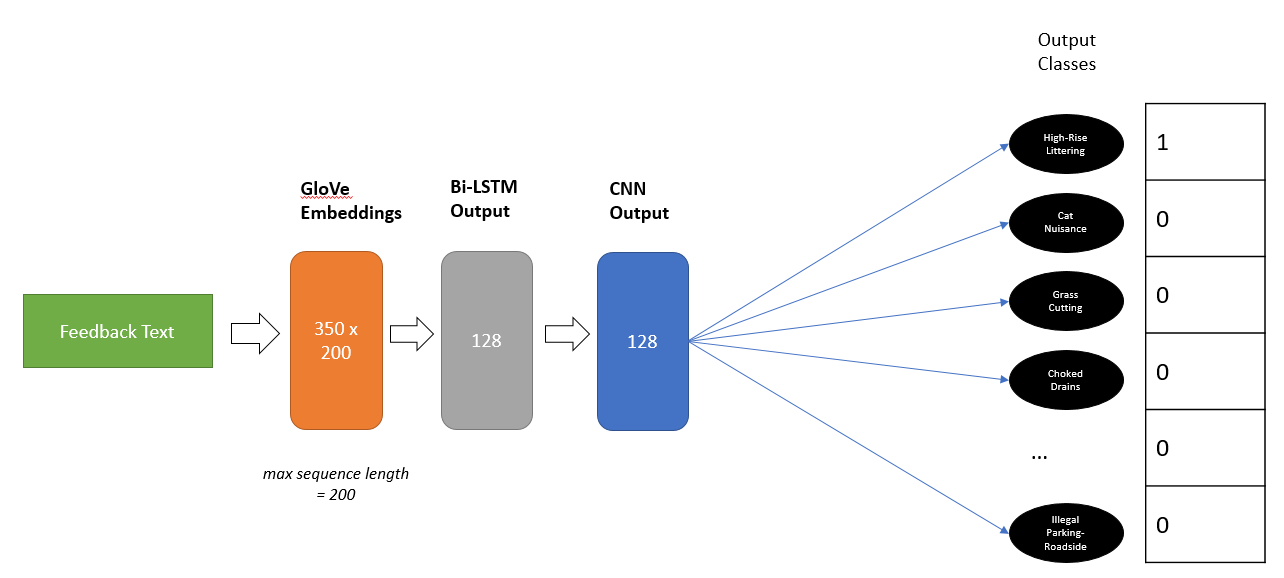

## Create Attention Layer
You can use the final encoded state of a recurrent neural network for prediction. This could lose some useful information encoded in the previous steps of the sequence. In order to keep that information, you can use an average of the encoded states outputted by the RNN. But all of the encoded states of the RNN are equally valuable. Thus, we are using a weighted sum of these encoded states to make our prediction.

In [ ]:
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate
from tensorflow.keras.layers import Layer


class Attention(Layer):

    def __init__(self, units=128, **kwargs):
        self.units = units
        super().__init__(**kwargs)

    def __call__(self, inputs):
        """
        Many-to-one attention mechanism for Keras.
        @param inputs: 3D tensor with shape (batch_size, time_steps, input_dim).
        @return: 2D tensor with shape (batch_size, 128)
        @author: felixhao28, philipperemy.
        """
        hidden_states = inputs
        hidden_size = int(hidden_states.shape[2])
        # Inside dense layer
        #              hidden_states            dot               W            =>           score_first_part
        # (batch_size, time_steps, hidden_size) dot (hidden_size, hidden_size) => (batch_size, time_steps, hidden_size)
        # W is the trainable weight matrix of attention Luong's multiplicative style score
        score_first_part = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)
        #            score_first_part           dot        last_hidden_state     => attention_weights
        # (batch_size, time_steps, hidden_size) dot   (batch_size, hidden_size)  => (batch_size, time_steps)
        h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
        score = Dot(axes=[1, 2], name='attention_score')([h_t, score_first_part])
        attention_weights = Activation('softmax', name='attention_weight')(score)
        # (batch_size, time_steps, hidden_size) dot (batch_size, time_steps) => (batch_size, hidden_size)
        context_vector = Dot(axes=[1, 1], name='context_vector')([hidden_states, attention_weights])
        pre_activation = Concatenate(name='attention_output')([context_vector, h_t])
        attention_vector = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)
        return attention_vector

    def get_config(self):
        return {'units': self.units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

We compute these attention weights simply by building a small fully connected neural network on top of each encoded state. This network will have a single unit final layer which will correspond to the attention weight we will assign.
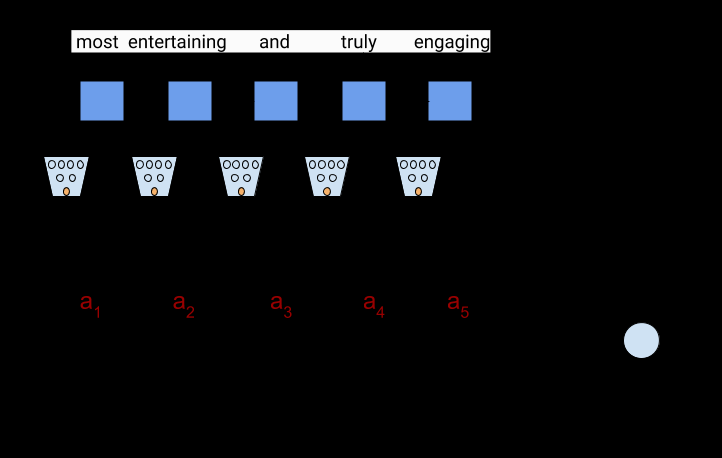
## Bi-directional RNN
We will use a bi-directional RNN. This is simply the concatentation of two RNNs, one which processes the sequence from left to right (the “forward” RNN) and one which process from right to left (the “backward” RNN). By using both directions, we get a stronger encoding as each word can be encoded using the context of its neighbors on boths sides rather than just a single side. 
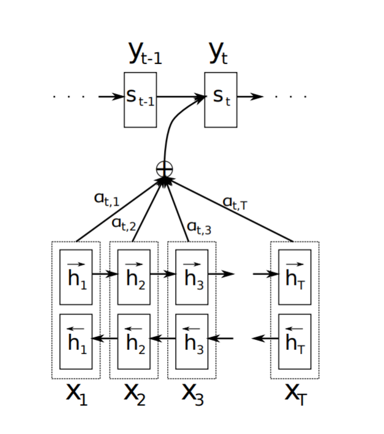

https://stackoverflow.com/questions/62948332/how-to-add-attention-layer-to-a-bi-lstm
https://github.com/philipperemy/keras-attention-mechanism/blob/master/examples/example-attention.py
https://matthewmcateer.me/blog/getting-started-with-attention-for-classification/

from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM
# Define/compile the model.
time_steps, input_dim =  1, 768
model_input = Input(shape=(time_steps, input_dim))
bilstm1 = Bidirectional(LSTM(64, return_sequences=True))(model_input)
bilstm2 = Bidirectional(LSTM(32, return_sequences=True))(bilstm1)
x = Attention(32)(bilstm2)
y = Dense(1)(x)
ModelBilstm= Model(inputs=model_input, outputs=y)

In [ ]:
# summarize layers
#print(ModelBilstm.summary())

In [ ]:
#tf.keras.utils.plot_model(model=ModelBilstm, show_shapes=True, dpi=76, )

## compile models: 

In [ ]:
#es = EarlyStopping(monitor='loss',min_delta=0.0000000000000000001, patience=10)
#rmse = RootMeanSquaredError()
#optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
#ModelBilstm.compile(optimizer=optimizer, loss='mse', metrics=[rmse])


# Train

# fit model using our gpu
with tf.device('/gpu:0'):
    history_ModelBilstm = ModelBilstm.fit(cls_emb.reshape(-1, 1,768),
                                     target.reshape(-1, 1, 1), 
                                     batch_size=8,
                                     epochs=1000, 
                                     verbose=0,
                                     callbacks=[es ],validation_split=0.1)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['root_mean_squared_error']
    val_acc = history.history['val_root_mean_squared_error']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training root_mean_squared_error')
    plt.plot(x, val_acc, 'r', label='Validation root_mean_squared_error')
    plt.title('Training and validation root_mean_squared_error')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history_ModelBilstm)


loss_Bi_LSTM, root_mean_squared_error_Bi_LSTM = ModelBilstm.evaluate( cls_emb.reshape(-1, 1,768),
                                     target.reshape(-1, 1, 1), verbose=0)
print('root_mean_squared_error_model: %f' % (root_mean_squared_error_Bi_LSTM *100))
print('loss_model: %f' % (loss_Bi_LSTM *100))

# Sumbmission: 

In [ ]:
# initialize two arrays for input tensors
Xids_test = np.zeros((len(test_raw), SEQ_LEN))
Xmask_test = np.zeros((len(test_raw), SEQ_LEN))

for i, sentence in enumerate(test_raw['excerpt']):
    Xids_test[i, :], Xmask_test[i, :] = tokenize(sentence)
    if i % 10000 == 0:
        print(i)  # do this so we can see some progress

In [ ]:
cls_emb_test = model.predict([Xids_test, Xmask_test])

In [ ]:
cls_emb_test.shape

In [ ]:
preds = model_RNN.predict(cls_emb_test.reshape(-1, 1,768))   
# use the method pipeline.predict on X_test data to predict the labels

my_submission = pd.DataFrame({'id': test_raw.id, 'target': preds.ravel()})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)


In [ ]:
my_submission

loss_RNN, root_mean_squared_error_RNN = model_RNN.evaluate( cls_emb.reshape(-1, 1,768),
                                     target.reshape(-1, 1, 1), verbose=0)
print('root_mean_squared_error_model: %f' % (root_mean_squared_error_RNN *100))
print('loss_model: %f' % (loss_RNN *100))# summarize layers
print(BilstmAttentiondel.summary())https://medium.com/dsaid-govtech/building-text-classifiers-to-handle-municipal-issues-experiments-with-tf-idf-glove-bilstm-cnn-f175afafd5ea